<a href="https://colab.research.google.com/github/yingzibu/MOL2ADMET/blob/main/results/M5_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
print(torch.__version__)
print('cuda: ', torch.cuda.is_available())

2.1.0+cu121
cuda:  True


In [3]:
cd /content/drive/MyDrive/ADMET

/content/drive/MyDrive/ADMET


In [ ]:
! pip install rdkit --quiet
! pip install PyTDC --quiet
! pip install mycolorpy --quiet
! pip install selfies  --quiet
! pip install pubchempy --quiet
! pip install dgllife --quiet
! pip install molvs --quiet
! pip install dgl -f https://data.dgl.ai/wheels/cu121/repo.html --quiet
! pip install dglgo -f https://data.dgl.ai/wheels-test/repo.html --quiet
! pip install DeepPurpose --quiet
! pip install git+https://github.com/bp-kelley/descriptastorus --quiet
! pip install pandas-flavor --quiet

In [10]:
from scripts.yaml_utils import *

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


In [14]:
def visualize_M5(name, repeat_times=3):
    from tqdm import tqdm
    model_types = ['MLP', 'AttentiveFP', 'GIN', 'RNN']

    dict_ST = {}
    dict_MT = {}
    for model_type in tqdm(model_types, total=len(model_types),
                           desc='obtaining preformance'):
        dict_ST[model_type] = []
        dict_MT[model_type] = []
        for i in range(3):

            p_ST = yml_report(f'ST/{name}/{model_type}_ST_{i}.yml')
            p_MT = yml_report(f'M5/uw_no/{model_type}_MT_{i}.yml')

            dict_ST[model_type].append(p_ST[name])
            dict_MT[model_type].append(p_MT[name])

    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    import numpy as np

    # Sample data (assuming you have 3 runs for each algorithm type)
    CLS_METRICS = ['Accuracy', 'Weighted Accuracy', 'Precision', 'Recall', 'SP',
                'F1', 'AUC', 'MCC', 'AP']
    for met_num in range(len(cls_metrics)):
        # data = {
        #     'Algorithm': model_types,
        #     'ST_1': [dict_ST[model_type][0][met_num] for model_type in model_types],  # Performance for ST-algorithm, run 1
        #     'ST_2': [dict_ST[model_type][1][met_num] for model_type in model_types],  # Performance for ST-algorithm, run 2
        #     'ST_3': [dict_ST[model_type][2][met_num] for model_type in model_types],   # Performance for ST-algorithm, run 3
        #     'MT_1': [dict_MT[model_type][0][met_num] for model_type in model_types],  # Performance for MT-algorithm, run 1
        #     'MT_2': [dict_MT[model_type][1][met_num] for model_type in model_types],  # Performance for MT-algorithm, run 2
        #     'MT_3': [dict_MT[model_type][2][met_num] for model_type in model_types]   # Performance for MT-algorithm, run 3
        # }
        data = {}
        data['Algorithm'] = model_types
        for i in range(repeat_times):
            data[f'ST_{i}'] = [dict_ST[model_type][i][met_num] for model_type in model_types]
            data[f'MT_{i}'] = [dict_MT[model_type][0][met_num] for model_type in model_types]

        # Convert data to long format for easier plotting
        df = pd.DataFrame(data)
        df_long = pd.melt(df, id_vars=['Algorithm'], var_name='Run', value_name='Performance')

        # Extract Algorithm Type from Run column
        df_long['Algorithm Type'] = np.where(df_long['Run'].str.startswith('ST'), 'ST', 'MT')

        # Plot
        plt.figure(figsize=(6, 3))
        sns.barplot(x='Algorithm', y='Performance', hue='Algorithm Type', data=df_long, ci='sd')
        plt.title(f'Single-Task v.s. Multi-Task, on {name}')
        plt.xlabel('Algorithms')
        plt.ylabel(f'{CLS_METRICS[met_num]}')
        plt.legend(title='Algorithm Type')
        plt.show()
        plt.close()

obtaining preformance: 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]


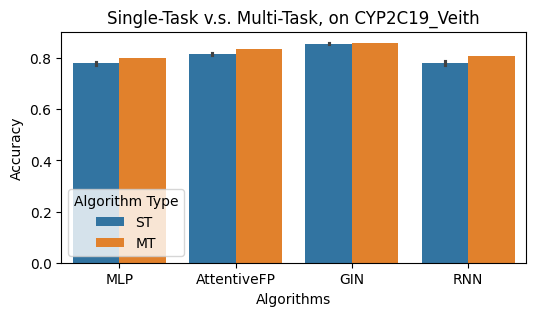

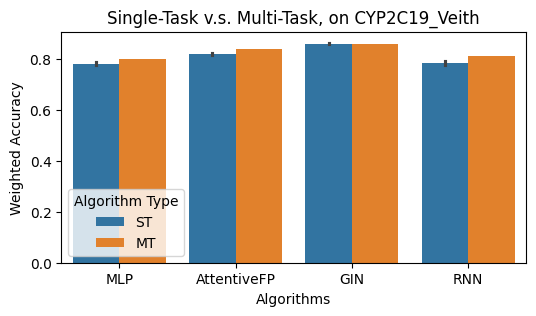

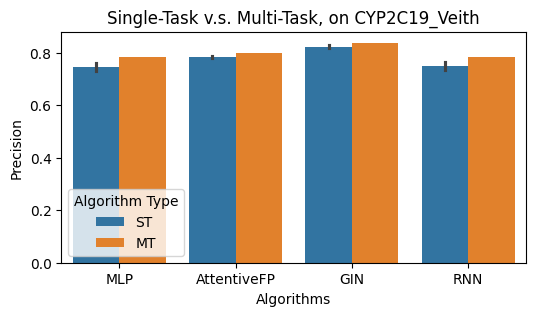

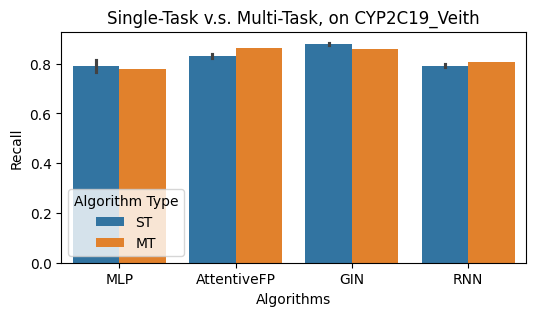

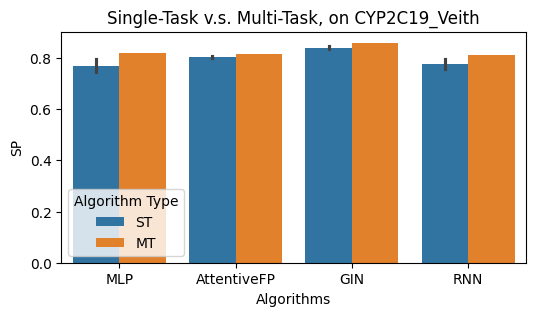

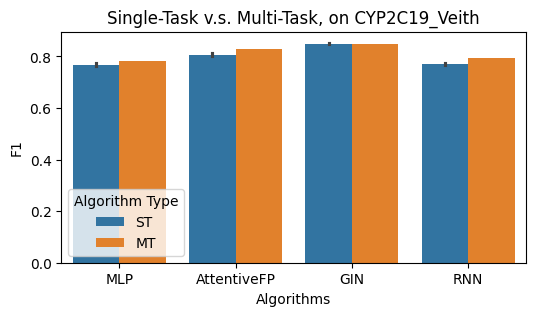

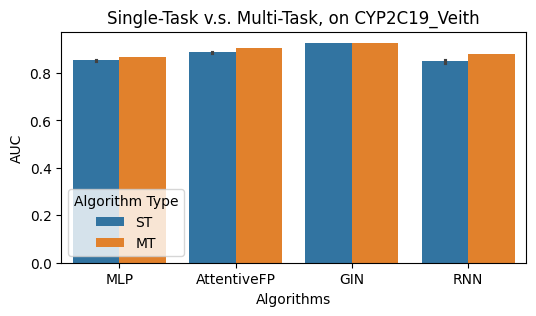

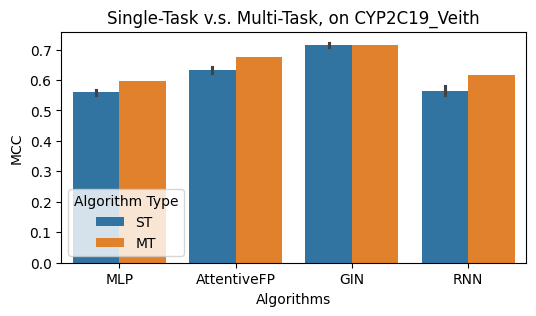

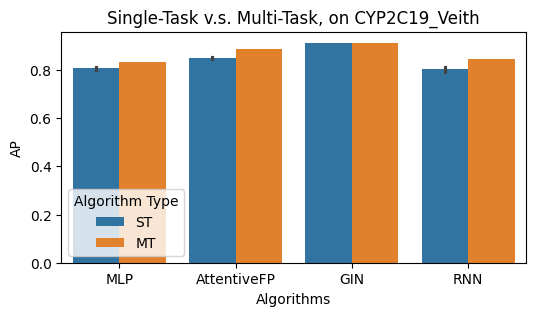

obtaining preformance: 100%|██████████| 4/4 [00:04<00:00,  1.12s/it]


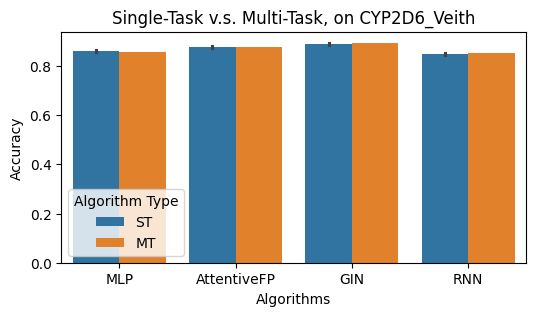

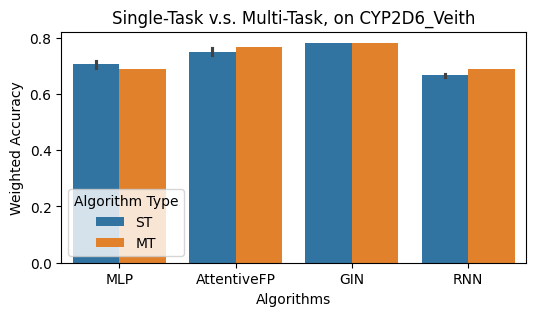

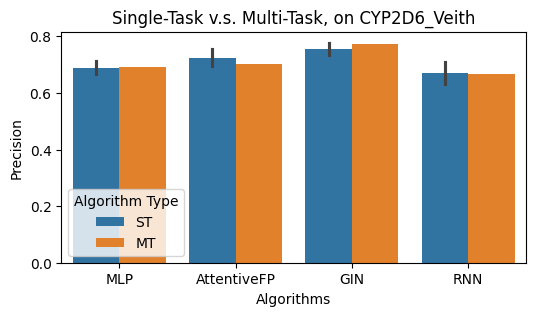

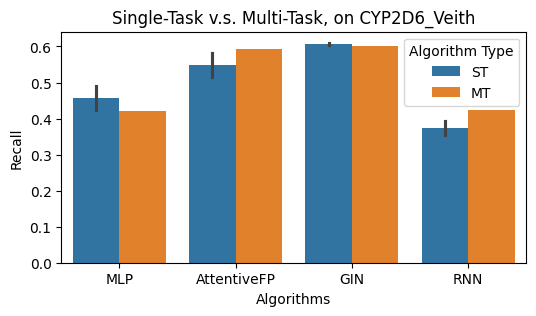

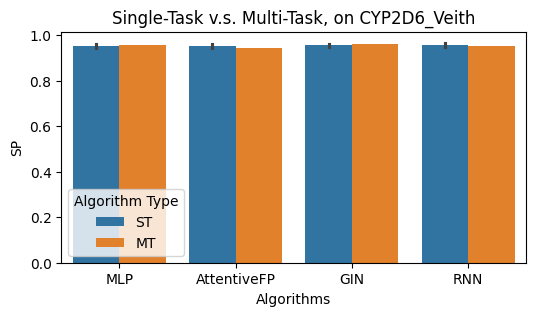

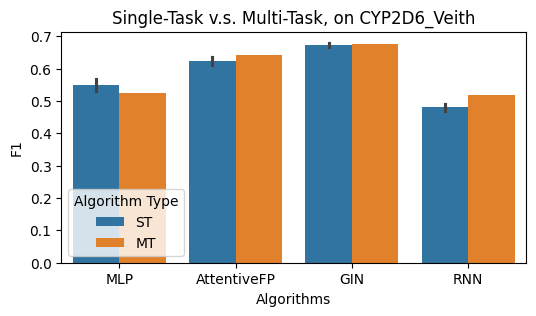

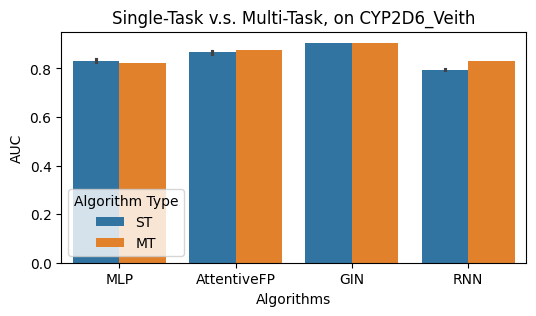

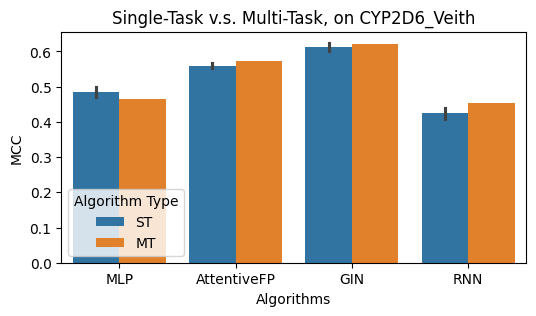

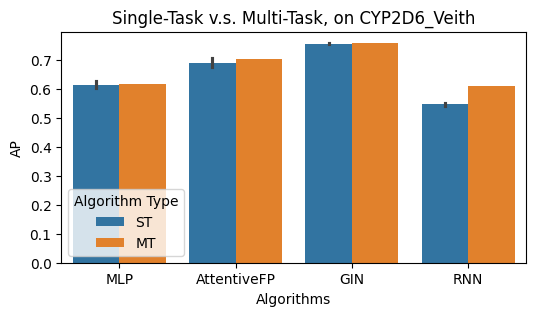

obtaining preformance: 100%|██████████| 4/4 [00:04<00:00,  1.20s/it]


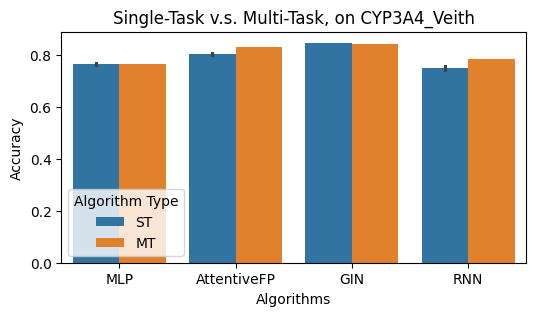

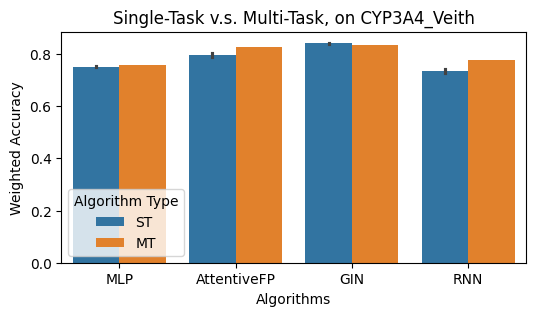

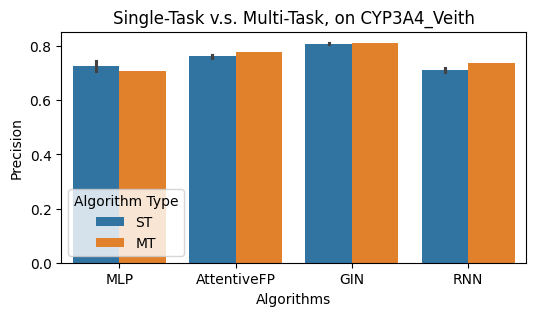

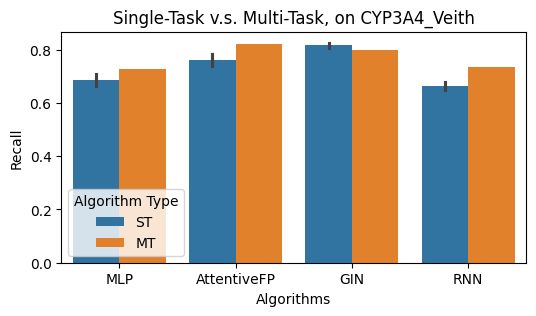

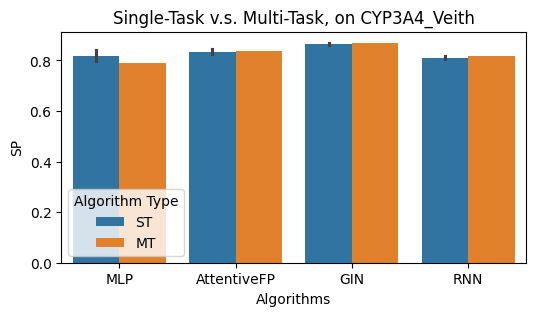

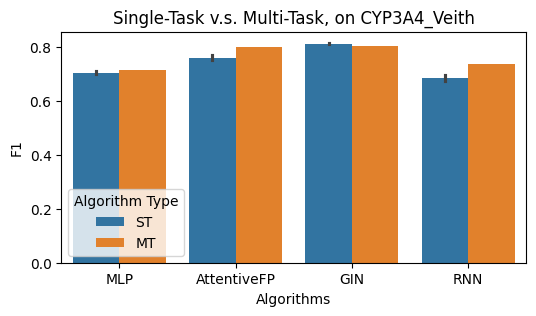

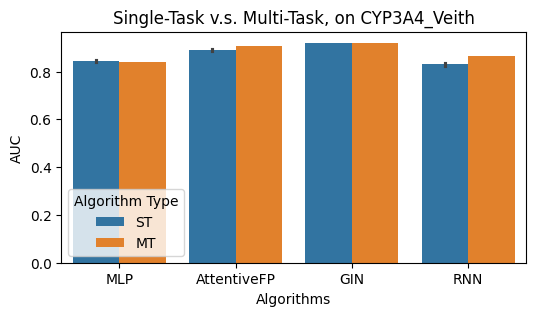

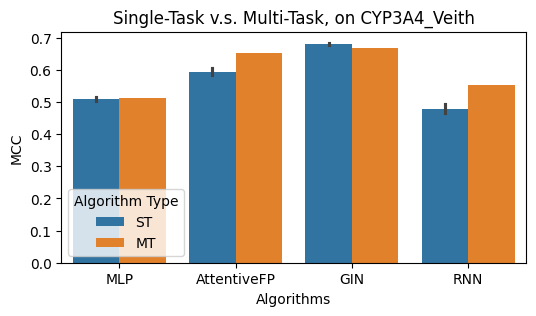

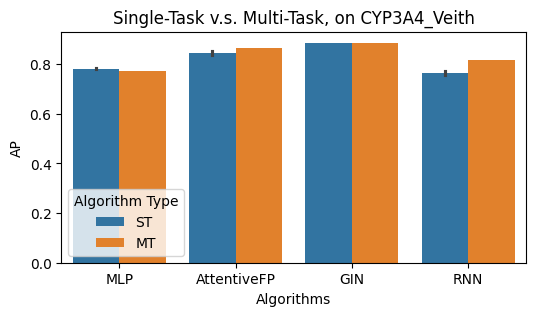

obtaining preformance: 100%|██████████| 4/4 [00:04<00:00,  1.22s/it]


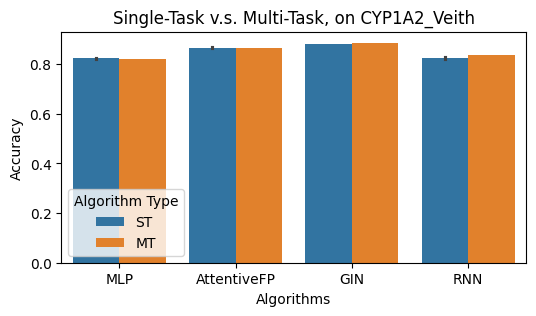

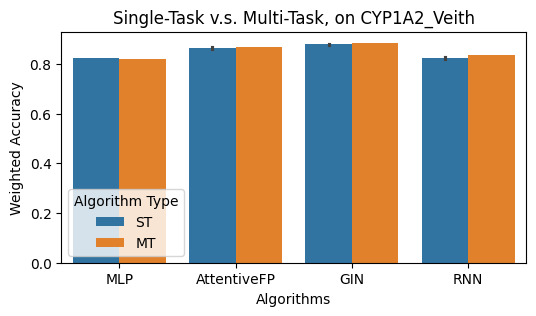

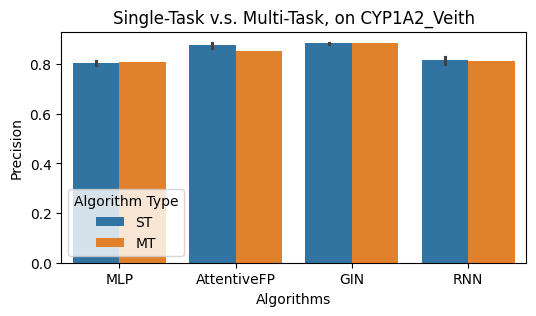

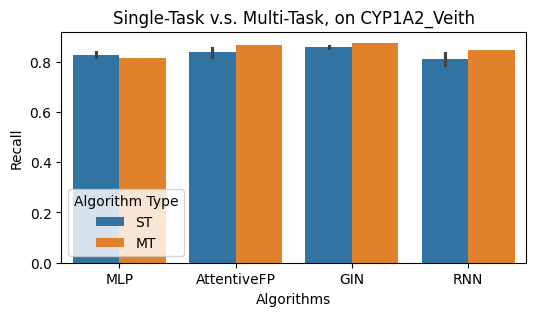

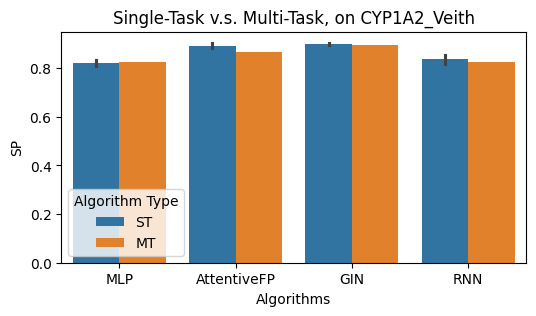

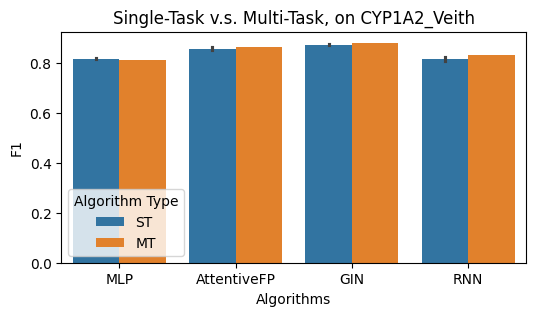

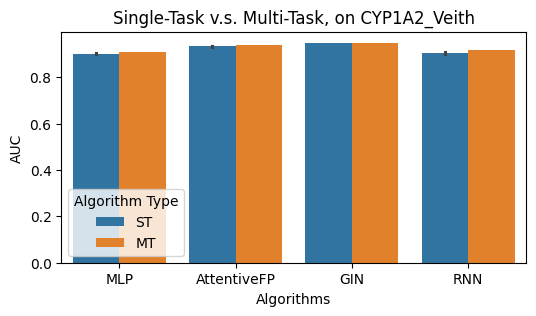

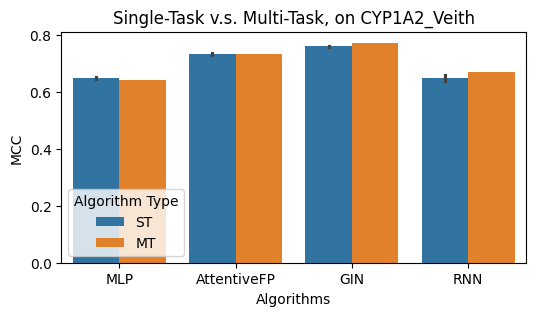

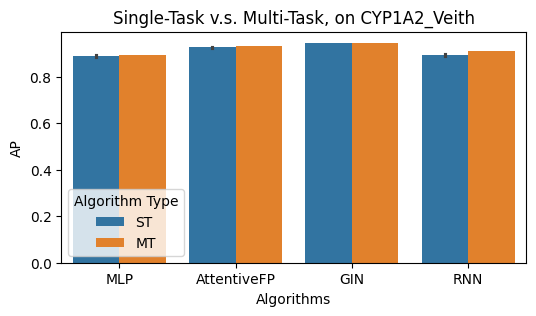

obtaining preformance: 100%|██████████| 4/4 [00:04<00:00,  1.09s/it]


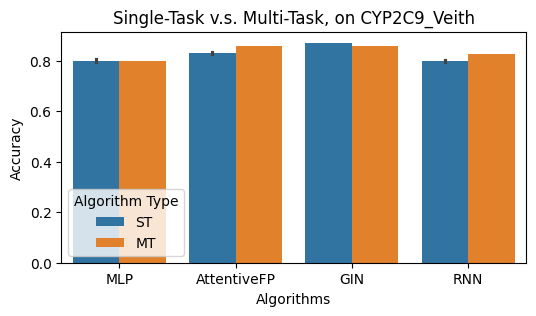

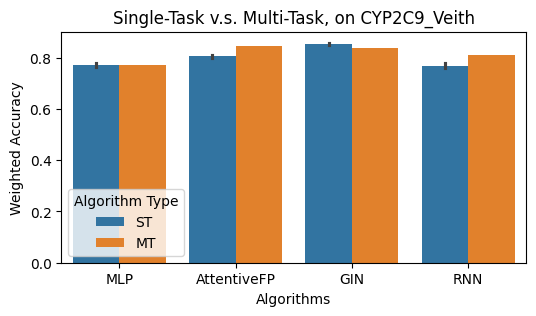

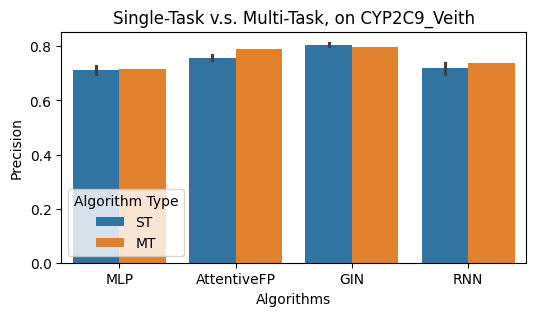

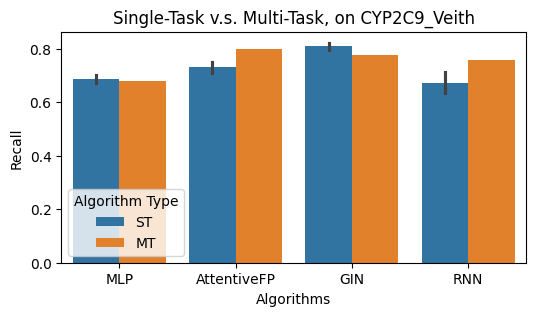

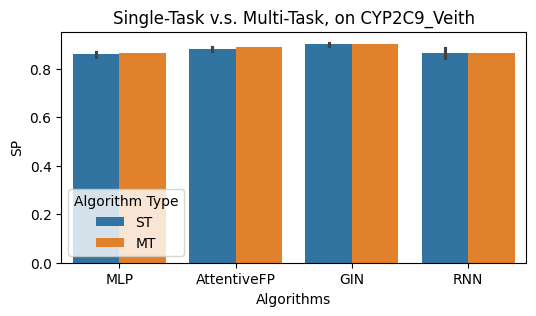

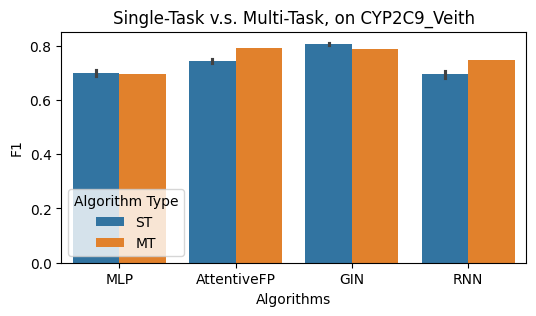

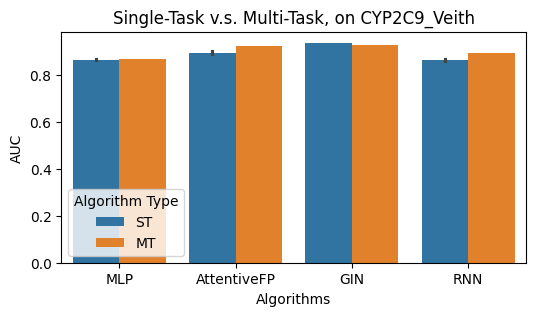

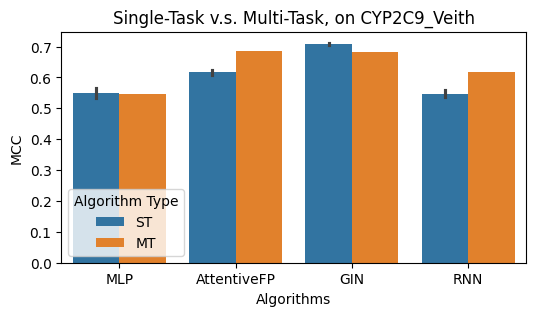

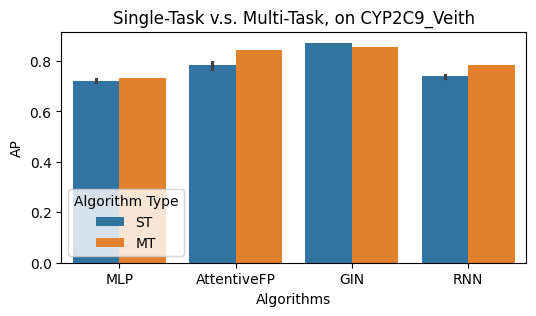

In [17]:
for name in names_M5:
    visualize_M5(name)
    print('\n\n\n')